# Import、載入資料

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import layers
from tensorflow import keras
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import scale
from mlxtend.plotting import scatterplotmatrix

In [ ]:
def load_data(housing_csv):
  csv_path = os.path.join('/content/drive/MyDrive/MachineLearn/house-regression/',housing_csv)
  return pd.read_csv(csv_path)

In [ ]:
train_originData = load_data('train-v3.csv')
valid_originData = load_data('valid-v3.csv')
test_originData = load_data('test-v3.csv')

#圖像整理(資料分析)

In [ ]:
train_originData.head()

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.0,1900,8160,1,0,0,3,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.0,3380,16133,1,0,1,3,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.0,2070,9000,1,0,0,4,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.0,1150,8924,1,0,0,3,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.5,2040,7503,2,0,0,3,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503


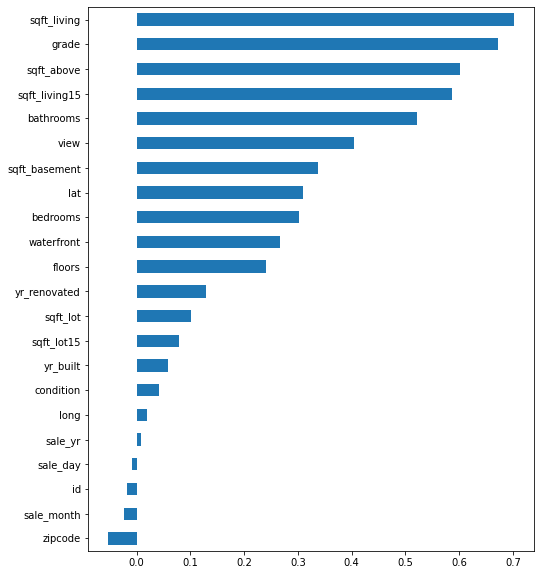

In [ ]:
plt.figure(figsize = (8,10))
train_originData.corr()["price"].sort_values().drop("price").plot(kind = "barh");

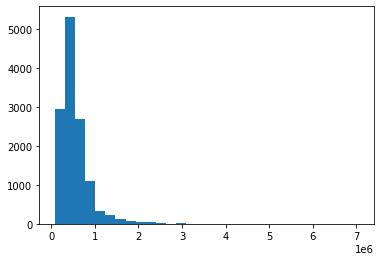

In [ ]:
plt.hist(train_originData['price'],bins=30)
plt.show()

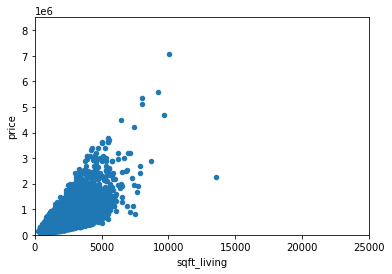

In [ ]:
var = 'sqft_living'
data = pd.concat([train_originData['price'], train_originData[var]], axis=1)
data.plot.scatter(x=var, y='price',xlim=(0,25000), ylim=(0,8500000));

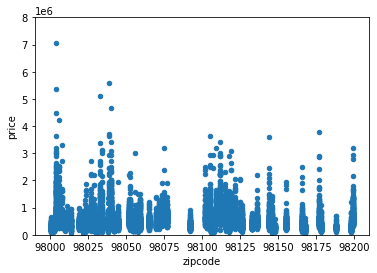

In [ ]:
var = 'zipcode'
data = pd.concat([train_originData['price'], train_originData[var]], axis=1)
data.plot.scatter(x=var, y='price',xlim=(97990,98210), ylim=(0,8000000));

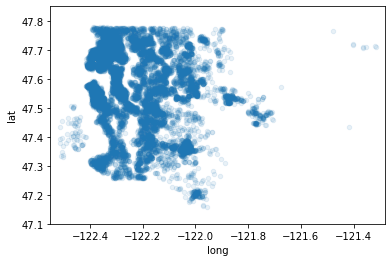

In [ ]:
var = 'long'
data = pd.concat([train_originData['lat'], train_originData[var]], axis=1)
data.plot.scatter(x=var, y='lat',xlim=(-122.55,-121.28), ylim=(47.1,47.85),alpha = 0.1);

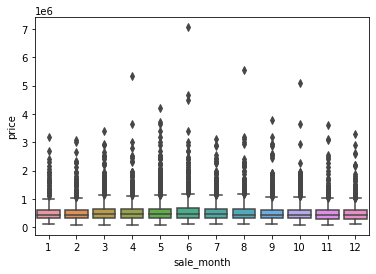

In [ ]:
sns.boxplot(x = 'sale_month', y = 'price', data = train_originData);

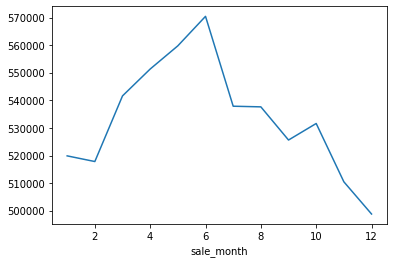

In [ ]:
train_originData.groupby('sale_month')['price'].mean().plot();

In [ ]:
#cols = ['sale_yr','sale_month','sale_day','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15','price']
#scatterplotmatrix(train_originData[cols].values.astype(float), figsize=(50,50), names=cols, alpha=0.5)
#plt.tight_layout()
#plt.show()

# 資料預處理

In [ ]:
train_Data = train_originData
valid_Data = valid_originData
test_Data = test_originData

In [ ]:
train_originData.head(5)

,id,price,sale_yr,sale_month,sale_day,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,5615100330,200000,2015,3,27,4,2.0,1900,8160,1,0,0,3,7,1900,0,1975,0,98022,47.2114,-121.986,1280,6532
1,8835900086,350000,2014,9,2,4,3.0,3380,16133,1,0,1,3,8,2330,1050,1959,0,98118,47.5501,-122.261,2500,11100
2,9510900270,254000,2014,12,11,3,2.0,2070,9000,1,0,0,4,7,1450,620,1969,0,98023,47.3085,-122.376,1630,7885
3,2621600015,175000,2015,4,30,3,1.0,1150,8924,1,0,0,3,6,1150,0,1943,0,98030,47.3865,-122.217,1492,8924
4,8078350090,619000,2015,3,31,3,2.5,2040,7503,2,0,0,3,8,2040,0,1987,0,98029,47.5718,-122.021,2170,7503


In [ ]:
train_Data.loc[train_Data['yr_renovated'] >0 ,'yr_built'] = train_Data['yr_renovated']
valid_Data.loc[valid_Data['yr_renovated'] >0 ,'yr_built'] = valid_Data['yr_renovated']
test_Data.loc[test_Data['yr_renovated'] >0 ,'yr_built'] = test_Data['yr_renovated']

In [ ]:
train_Data = train_Data[train_Data['bedrooms'] < 11]
train_Data = train_Data[train_Data['sqft_living'] < 12000]
train_Data = train_Data[train_Data['sqft_lot15'] < 800000]

In [ ]:
#dropData = {'id','sale_yr','sale_month','sale_day','zipcode','view','waterfront','yr_renovated'}
dropData = {'id'}

In [ ]:
train_Data = train_originData.drop(dropData,axis=1)
valid_Data = valid_originData.drop(dropData,axis=1)
test_Data = test_originData.drop(dropData,axis=1)

In [ ]:
x_train = train_Data.drop(['price'],axis=1)
y_train = train_Data['price'].values
x_valid = valid_Data.drop(['price'],axis=1)
y_valid = valid_Data['price'].values
x_test = test_Data

In [ ]:
train_Data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702100
grade            0.672523
sqft_above       0.601167
sqft_living15    0.586408
bathrooms        0.521330
view             0.404273
sqft_basement    0.337082
lat              0.309688
bedrooms         0.301817
waterfront       0.266653
floors           0.241054
yr_renovated     0.129219
yr_built         0.108181
sqft_lot         0.101519
sqft_lot15       0.078428
condition        0.040836
long             0.020066
sale_yr          0.007752
sale_day        -0.008888
sale_month      -0.024029
zipcode         -0.052930
Name: price, dtype: float64

In [ ]:
#mean = x_train.mean()
#std = x_train.std()
#X_train = (x_train-mean)/std
#X_valid = (x_valid-mean)/std
#X_test = (x_test-mean)/std

In [ ]:
scaler = StandardScaler().fit(x_train)
X_train = scaler.transform(x_train)
X_valid = scaler.transform(x_valid)
X_test = scaler.transform(x_test)

# 建立模型



In [ ]:
filepath="./bestModel.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_weights_only=False)
es = EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='min')

In [ ]:
#initialRamdom = keras.initializers.random_normal(mean=0.0,stddev=0.05,seed=52)
model = keras.Sequential()
model.add(layers.Dense(64,kernel_initializer='normal',activation='relu',input_shape=(X_train.shape[1],)))
model.add(layers.Dense(48,kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(32,kernel_initializer='normal',activation='relu'))
model.add(layers.Dense(1,kernel_initializer='normal'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                1408      
                                                                 
 dense_5 (Dense)             (None, 48)                3120      
                                                                 
 dense_6 (Dense)             (None, 32)                1568      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,129
Trainable params: 6,129
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer=keras.optimizers.Adam(0.01978),loss='MAE')

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),batch_size=64,epochs=1000,callbacks=[es,checkpoint],verbose=0)


Epoch 00001: val_loss improved from inf to 117890.10156, saving model to ./bestModel.h5

Epoch 00002: val_loss improved from 117890.10156 to 107050.78906, saving model to ./bestModel.h5

Epoch 00003: val_loss improved from 107050.78906 to 105414.39062, saving model to ./bestModel.h5

Epoch 00004: val_loss improved from 105414.39062 to 103631.21875, saving model to ./bestModel.h5

Epoch 00005: val_loss improved from 103631.21875 to 102682.75000, saving model to ./bestModel.h5

Epoch 00006: val_loss improved from 102682.75000 to 100870.10156, saving model to ./bestModel.h5

Epoch 00007: val_loss did not improve from 100870.10156

Epoch 00008: val_loss improved from 100870.10156 to 100850.19531, saving model to ./bestModel.h5

Epoch 00009: val_loss improved from 100850.19531 to 99375.06250, saving model to ./bestModel.h5

Epoch 00010: val_loss improved from 99375.06250 to 99177.55469, saving model to ./bestModel.h5

Epoch 00011: val_loss did not improve from 99177.55469

Epoch 00012: val

In [ ]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

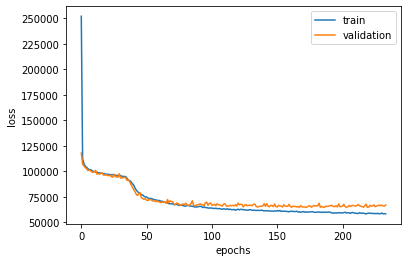

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

In [ ]:
from keras.models import load_model
filepath = "./bestModel.h5"
model = load_model(filepath)

In [ ]:
final_result=model.predict(X_test)

In [ ]:
final_result=np.reshape(final_result,(len(test_Data),))
print(final_result)

[702552.4  701646.44 511180.5  ... 316924.62 420607.84 206402.  ]


In [ ]:
with open('submit_results.csv', 'w') as f:
    f.write('Id,price\n')
    for i in range(len(final_result)):
        f.write(str(i+1) + ',' + str(final_result[i]) + '\n')